# Tensorflow 2.x 를 이용한 선형회귀


Sequential()
- model로 선언한 뒤에 model.add()라는 코드를 통해 층을 단계적으로 추가

Compile(optimizer= '', loss='',)
-  모델을 기계가 이해할 수 있도록 컴파일
- 오차 함수와 최적화 방법, 메트릭 함수를 선택할 수 있음
  - optimizer : 훈련 과정을 설정하는 옵티마이저를 설정.'adam'과 같은 문자열로 설정가능
  - loss       :  훈련 과정에서 사용할 손실 함수(loss function)를 설정, 'MSE'와 같은 문자열로 설정가능
</br>
</br>


fit(  X = (훈련데이터), Y = (정답) , epochs = (총 훈련횟수) )
-  모델이 오차로부터 매개 변수를 업데이트 시키는 과정을 학습, 훈련, 또는 적합(fitting), 모델이 데이터에 적합해가는 과정

In [12]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

In [3]:
tf.__version__

'2.6.0'

In [4]:
X = np.array([1, 2, 3], dtype = 'float32') # 1칸 ,3줄
y = np.array([2, 2.5 ,3.5], dtype = 'float32')

In [ ]:
model = Sequential()

# Dense(출력수, input_dim = 입력수)
model.add(Dense(1, input_dim = 1))

# param : w, b 개수
model.summary()

In [24]:
model.compile(
    loss = "mean_squared_error", # 오차가 최소가 되도록
    optimizer = Adam(lr = 0.1) # w,b 계산
    )

model.fit(X, y, epochs=1000)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [30]:
model.layers[0].get_weights()

[array([[0.7500004]], dtype=float32), array([1.1666658], dtype=float32)]

# Cost function

- 예측을 하는 값과 실제 결과 값의 차이를 나타내는 함수

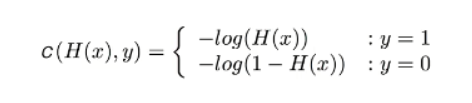

Activation function
- 입력 신호의 총합을 출력신호로 변환하는 함수
---
1. sigmoid : 출력 값을 0에서 1로 변경

## 인공신경망을 이용한 AND 연산

In [9]:
from math import e
import numpy as np

In [8]:
# sigmoid
w = 2
b = 1

# 예측1
hypothesis = w * -3 + b

# 선형회귀 결과(sigmoid)
print(hypothesis)
print(1/(1 + e** -hypothesis))

# 예측2
hypothesis = w * -1.5 + b
print(hypothesis)

# 선형회귀 결과(sigmoid)
print(1/(1 + e** -hypothesis))

-5
0.006692850924284857
-2.0
0.11920292202211757


In [30]:
# AND 연산 
X = np.array([ 
          [0, 0],
          [0, 1],
          [1, 0],
          [1, 1]
], dtype = 'float32')

y = np.array([
          [0],
          [0],
          [0],
          [1]
], dtype = 'float32')

# weight
w = np.array([
              [1],
              [2]
], dtype = "float32")

# bias
b = np.array([3], dtype = "float32")

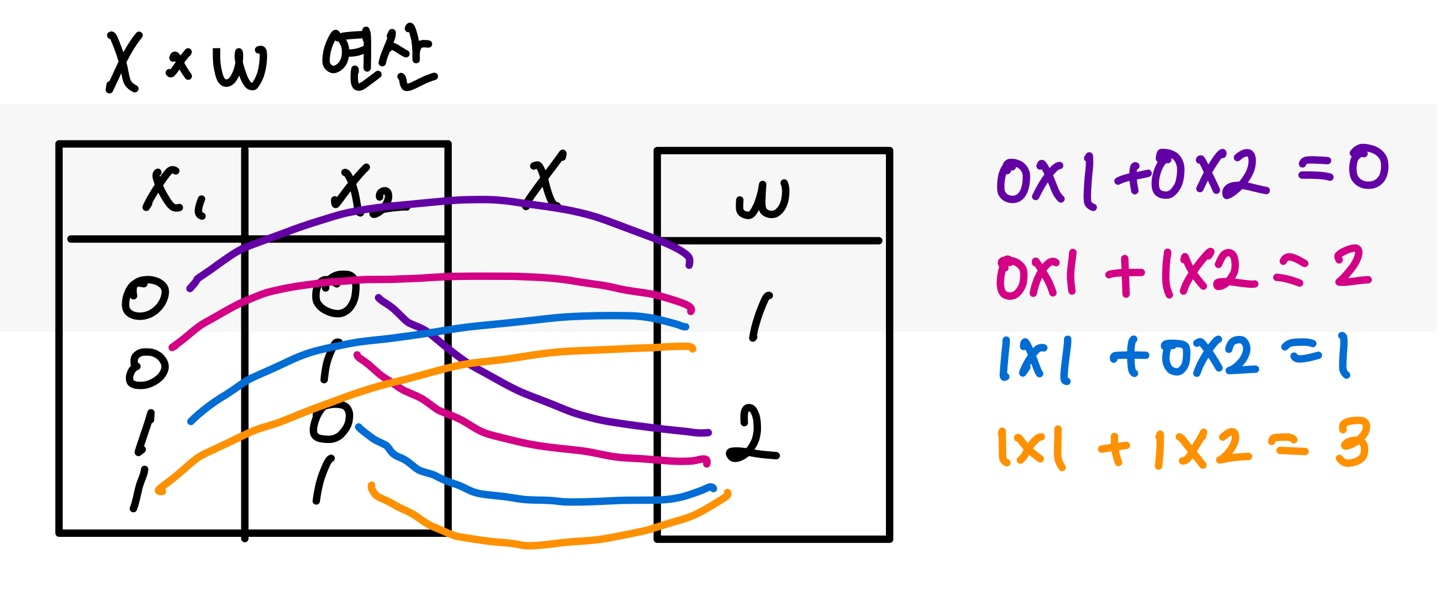

In [20]:
hypothesis = np.dot(X, w)+ b
print(hypothesis)

[[3.]
 [5.]
 [4.]
 [6.]]


In [53]:
# sigmoid 함수
# np.exp = e
def sigmoid(h):
  return 1/(1+ np.exp(-h))

# 결과 값을 0~1로 변환
hypothesis =  sigmoid(hypothesis)
print(hypothesis)

[[0.6590465 ]
 [0.65904653]
 [0.65904653]
 [0.65904653]]


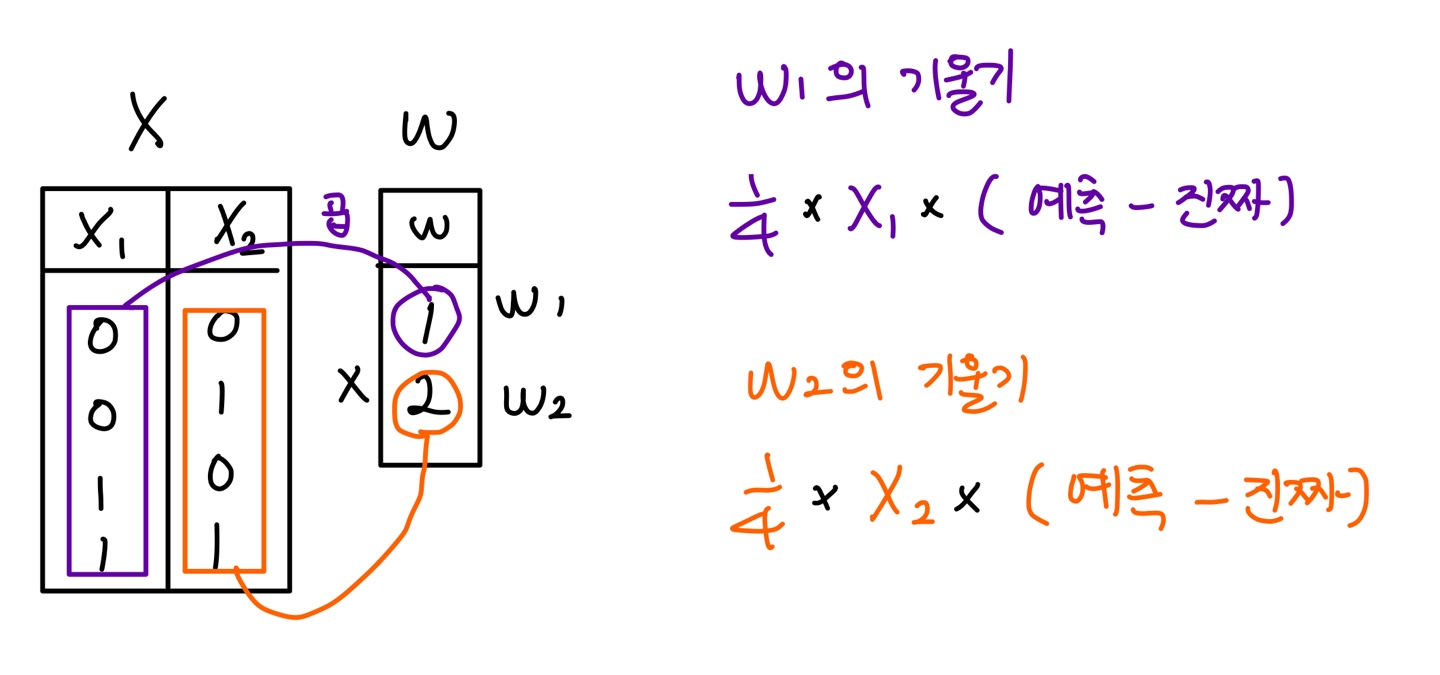

In [60]:
# reshape(줄, 칸) 변환
x1 = X.T[0].reshape(1, 4)
x2 = X.T[1].reshape(1, 4)
print(x1)
print("="*30)

# 예측
print((hypothesis - y))

# 예측 * X
np.sum(np.dot(x1,(hypothesis - y )))
print("="*30)

# w1_grad
w1_grad = 1/4 * np.sum(np.dot(x1,(hypothesis - y )))
w2_grad = 1/4 * np.sum(np.dot(x2,(hypothesis - y )))
print(w1_grad)
print(w2_grad)
print("="*30)

# b_grad
b_grad = 1/4 * np.sum((hypothesis - y))
print(b_grad)

[[0. 0. 1. 1.]]
[[ 0.6590465 ]
 [ 0.65904653]
 [ 0.65904653]
 [-0.34095347]]
0.07952326536178589
0.07952326536178589
0.4090465307235718


In [61]:
# 업데이트
w[0] = w[0] - 0.1 * w1_grad
w[1] = w[1] - 0.1 * w2_grad
print(w[0])
print(w[1])

b = b -0.1 * b_grad
print(b)

[0.99204767]
[1.9920477]
[2.9590952]


In [70]:
# 업데이트된 weight , bias가지고 새로운 예측
hypothesis = sigmoid(np.dot(X, w) + b)
print("예측:\n", hypothesis)

# cost 계산
cost = -1/4 * (y * np.log(hypothesis)) + (1-y) * np.log(1-hypothesis)
print("오차:\n",cost)

# 반복
learning_rate = 0.1
for i in range(1000):

예측:===
 [[0.9506916]
 [0.9929744]
 [0.9811302]
 [0.9973832]]
오차:===
 [[-3.0096605e+00]
 [-4.9581947e+00]
 [-3.9701917e+00]
 [ 6.5506314e-04]]


# 실습

## 71~74
- Tensorflow 2.x를 이용한 선형회귀


In [72]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [77]:
# 독립변수
X = np.array([1, 2, 3], dtype = "float32")

# 종속변수
y = np.array([2, 2.5, 3.5], dtype = "float32")

In [ ]:
# 입력값을 받고 예측 할 Sequentail 객체 생성
model = Sequential()

model.add(Dense(1, input_dim = 1))

model.summary()

# 오차 제곱의 합이 최소가 되는, w,b 를 찾음
model.compile(loss = "mean_squared_error", optimizer = Adam(lr = 0.1))

model.fit(X, y, epochs = 1000)

In [81]:
# w, b 찾기
print(model.layers[0].get_weights())

# weight
w = model.layers[0].get_weights()[0][0]
print(w)

# bias
b = model.layers[0].get_weights()[1][0]
print(b)

# 예측
print("X가 10일떄 Y =", w * 10 + b)
print("X가 20일떄 Y =", w * 20 + b)

# model로 바로 예측
pred = model.predict([10, 20])
print(pred)

[array([[0.7499997]], dtype=float32), array([1.1666673], dtype=float32)]
[0.7499997]
1.1666673
X가 10일떄 Y = [8.666664]
X가 20일떄 Y = [16.166662]
[[ 8.666664]
 [16.166662]]


## 인공 신경망을 이용한 AND연산
- 76~106


In [2]:
import numpy as np

In [ ]:
# AND 연산 
X = np.array([ 
          [0, 0],
          [0, 1],
          [1, 0],
          [1, 1]
], dtype = 'float32')

y = np.array([
          [0],
          [0],
          [0],
          [1]
], dtype = 'float32')

# weight
w = np.array([
              [1],
              [2]
], dtype = "float32")

# bias
b = np.array([3], dtype = "float32")

print("X =\n",X)
print("y =\n",y)
print("초기 예측\n", np.dot(X,w) + b)

print("예측값이 3,5,4,6? ")
print("0과 1보다큼,   주로 분류에 사용하는 회귀스틱 분석은 0~1 사이 신호를 가져야함\n\
       따라서 활성화 함수 Sigmoid를 사용 ")

In [4]:
def sigmoid(h):
  return 1 / (1 + np.exp(-h))

In [5]:
hypothesis =  sigmoid(np.dot(X,w) + b)

print(X)

X_col_2d1 = X.T[0].reshape(1, -1)
X_col_2d2 = X.T[1].reshape(1, -1)
print(X_col_2d1)
print(X_col_2d2)

# w1 수정값
w1_gred = 1 /4 * np.sum(np.dot(X_col_2d1, (hypothesis -y)))
print("w1_gred:",w1_gred)

# w2 수정값
w2_gred = 1 /4 * np.sum(np.dot(X_col_2d2, (hypothesis -y)))
print("w2_gred:",w2_gred)

# b 수정값
b_gred = 1/4 * np.sum(hypothesis - y)
print("b_gred :",b_gred)

[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
[[0. 0. 1. 1.]]
[[0. 1. 0. 1.]]
w1_gred: 0.24488529562950134
w2_gred: 0.24770864844322205
b_gred : 0.731355607509613


In [ ]:
learning_rate = 0.1

for i in range(1000):
  for j in range(2):
    hypothesis = sigmoid(np.dot(X, w)+b)
    print("예측값 = ", hypothesis)

    # 오차 계산
    cost = -1/4 * (y * np.log(hypothesis) + (1-y)*np.log(1-hypothesis))
    print("cost = ", cost)

    # 2차원 배열
    X_col_2d = X.T[j].reshape(1,-1)

    # w 기울기 
    w_grad = 1/4*np.sum(np.dot(X_col_2d,(hypothesis - y)))
    print("w_{}grad : {}".format(i,w_grad))

    # w 업데이트
    w[j] = w[j] - learning_rate * w_grad
    print("w{} : {}".format(j,w))
    
    # b 기울기
    b_grad = 1/4 * np.sum(hypothesis - y)
    print("b{}_grad:{}".format(i,b_grad))
    # b 업데이트
    b = b - learning_rate * b_grad
    print("b:{}".format(b))

    print("="*100)

In [16]:
predict = sigmoid(np.dot(X,w)+b)
predict01 = np.where(predict>=0.5, 1,0)
print("="*50)
print(predict)
print("predict01")
print(predict01)

[[0.00735112]
 [0.13858733]
 [0.13838431]
 [0.77724403]]
predict01
[[0]
 [0]
 [0]
 [1]]


In [17]:
predict02 = (predict01 == y)
print(y)
print(predict02)

acc = np.sum(predict02)/4
print(acc)

[[0.]
 [0.]
 [0.]
 [1.]]
[[ True]
 [ True]
 [ True]
 [ True]]
1.0


In [18]:
# 0, 1의 and 연산
arr = np.array([0 ,1], dtype = 'float32')
predict =  sigmoid(np.dot(arr, w) + b)
print(predict)

predict01 = np.where(predict > 0.5 , 1,0)
print("="*50)
print("predict01")
print(predict01)

[0.13858733]
predict01
[0]


In [19]:
# 1 1의 and 연산
arr = np.array([1 ,1], dtype = 'float32')
predict =  sigmoid(np.dot(arr, w) + b)
print(predict)

predict01 = np.where(predict > 0.5 , 1,0)
print("="*50)
print("predict01")
print(predict01)

[0.77724403]
predict01
[1]
